In [1]:
import tensorflow as tf
print(tf.__version__)

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

2.2.0-rc4


In [0]:
N = 1000
X = np.random.random((N,2))*6-3  #unifrom distribution between (-3,3)
Y = np.sin(2*X[:,0]) + np.cos(3*X[:,0])

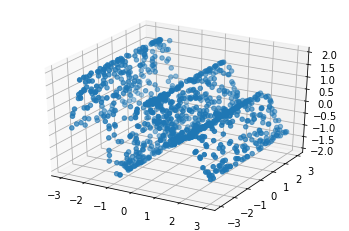

In [3]:
#plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)
#plt.show()

In [0]:
#Model Build
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(128, input_shape=(2,), activation='relu'),
  tf.keras.layers.Dense(1)
])

In [5]:
#Model Compilation
opt = tf.keras.optimizers.Adam(0.01)
model.compile(optimizer=opt, loss = "mse")
r = model.fit(X,Y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 0.9365
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8176
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7236
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5846
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5258
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4990
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5208
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4736
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4492
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4393
Epoch 11/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4358
Epoch 12/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4333
Epoch 13/100
32/32 [=================

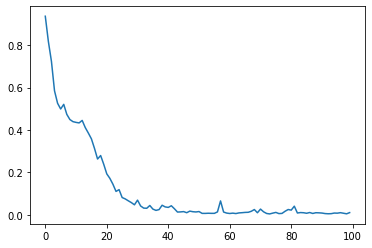

In [6]:
#Loss plot
plt.plot(r.history['loss'], label = 'loss')

1
2


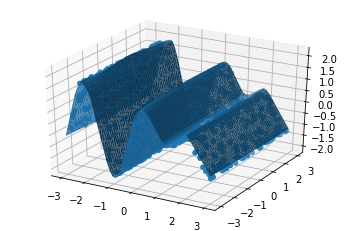

In [15]:
#plotting the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[:,0], X[:,1], Y)

#surface plot
line = np.linspace(-3,3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()

print(Yhat.ndim)
print(Xgrid.ndim)
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth = 0.2, antialiased = True)
#plt.show()

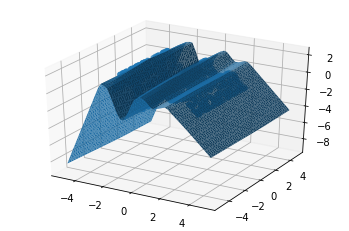

In [17]:
#plotting the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[:,0], X[:,1], Y)

#surface plot
line = np.linspace(-5,5, 50)
xx,yy = np.meshgrid(line,line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], yhat, linewidth = 0.2, antialiased = True)
plt.show()

#this shows that it doesnt exptrapolate